In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

c:\users\musaho\anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.0.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
rcParams['figure.figsize'] = 20,10

In [3]:
df_train = pd.read_csv('train_oSwQCTC/train.csv')
df_test = pd.read_csv('test_HujdGe7/test.csv')
submission = pd.read_csv('sample_submission_LMg97w5.csv')

In [4]:
submission

,Comb,Purchase
0,1000004P00128942,100
1,1000009P00113442,100
2,1000010P00288442,100
3,1000010P00145342,100
4,1000011P00053842,100
...,...,...
233594,1006036P00118942,100
233595,1006036P00254642,100
233596,1006036P00031842,100
233597,1006037P00124742,100


In [5]:
train = df_train.copy()
test = df_test.copy()

In [6]:
train.dtypes, train.shape

(User_ID                         int64
 Product_ID                     object
 Gender                         object
 Age                            object
 Occupation                      int64
 City_Category                  object
 Stay_In_Current_City_Years     object
 Marital_Status                  int64
 Product_Category_1              int64
 Product_Category_2            float64
 Product_Category_3            float64
 Purchase                        int64
 dtype: object, (550068, 12))

In [7]:
test.dtypes, test.shape

(User_ID                         int64
 Product_ID                     object
 Gender                         object
 Age                            object
 Occupation                      int64
 City_Category                  object
 Stay_In_Current_City_Years     object
 Marital_Status                  int64
 Product_Category_1              int64
 Product_Category_2            float64
 Product_Category_3            float64
 dtype: object, (233599, 11))

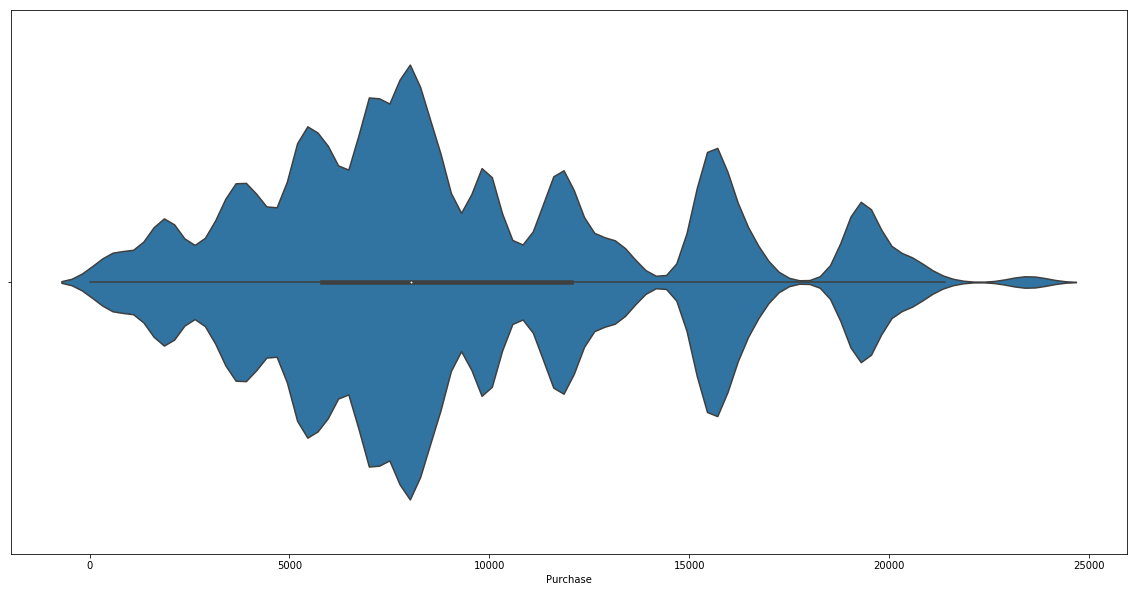

In [8]:
sns.violinplot(train.Purchase)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Text(0.5,0,'Stay in City in Years')

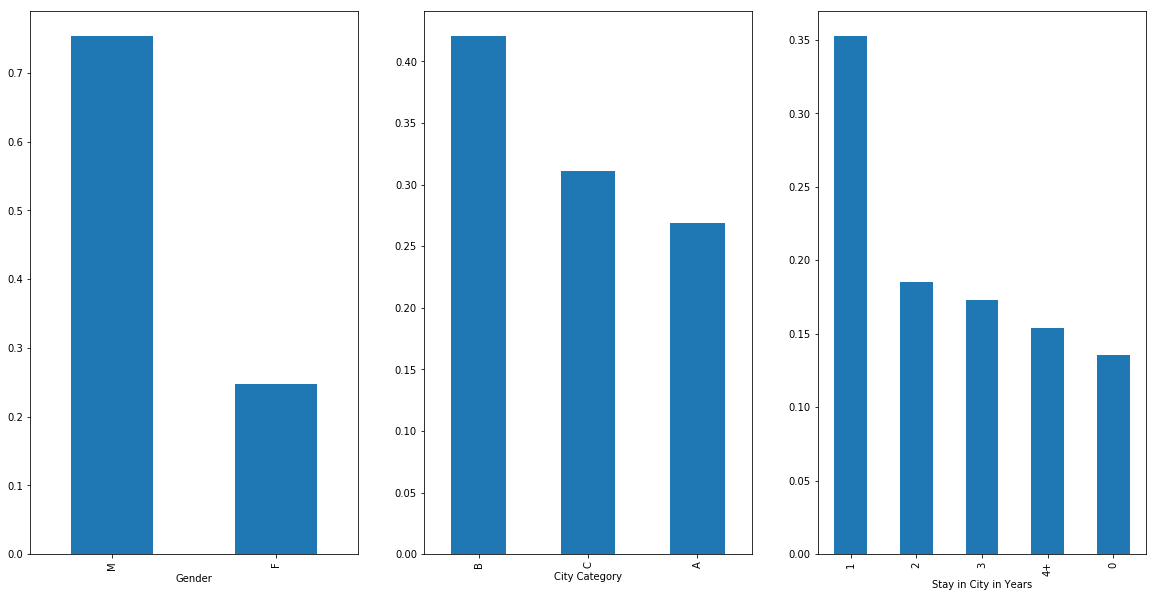

In [10]:
plt.subplot(131)
train.Gender.value_counts(normalize=True).plot.bar()
plt.xlabel('Gender')
plt.subplot(132)
train.City_Category.value_counts(normalize=True).plot.bar()
plt.xlabel('City Category')
plt.subplot(133)
train.Stay_In_Current_City_Years.value_counts(normalize=True).plot.bar()
plt.xlabel('Stay in City in Years')

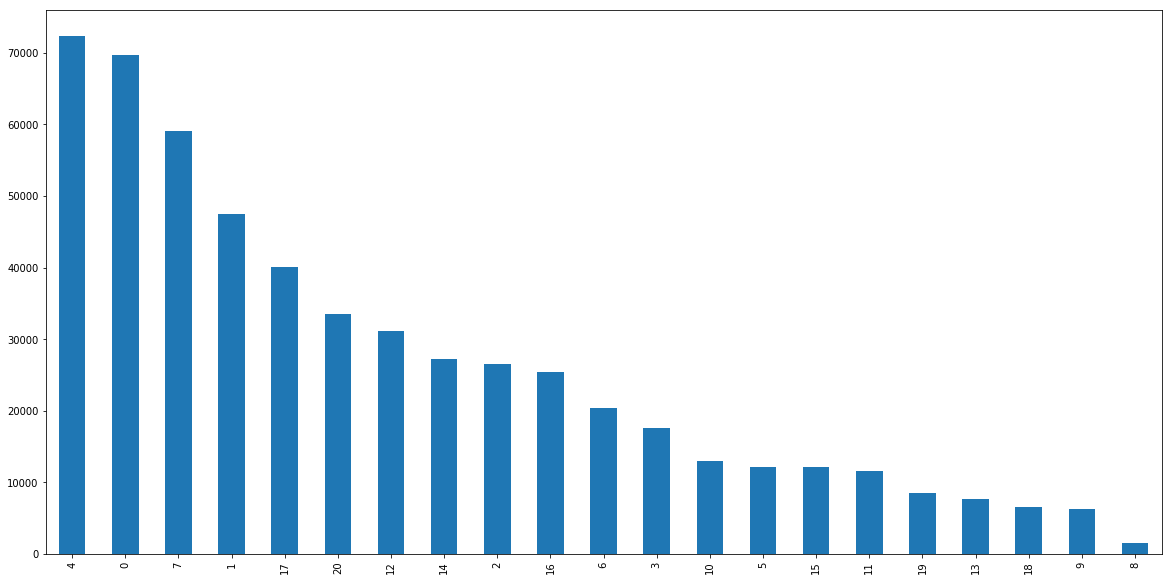

In [11]:
train.Occupation.value_counts().plot.bar()

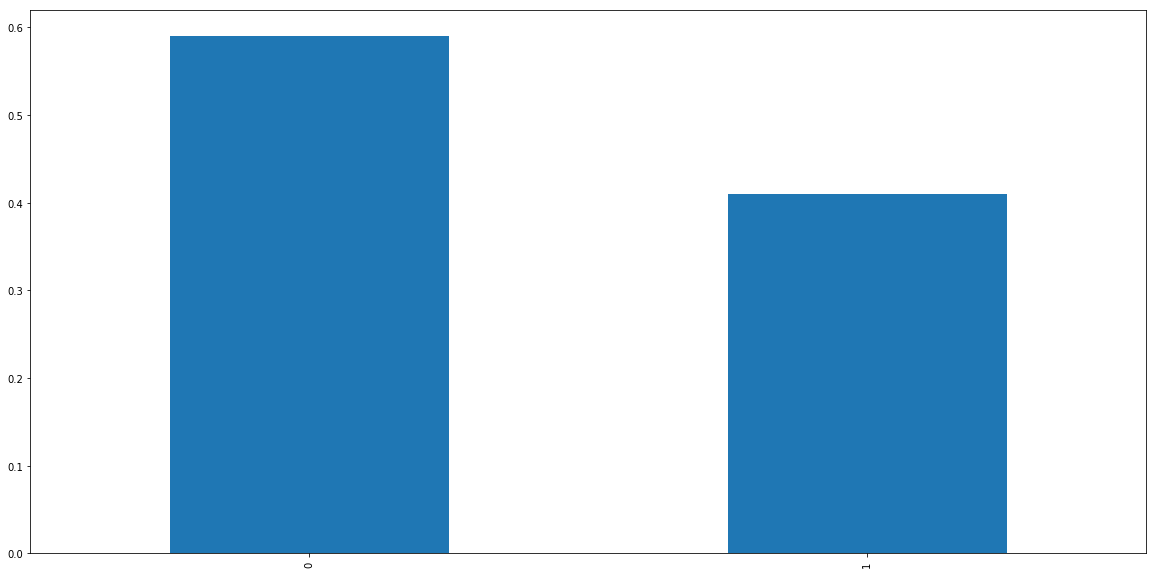

In [12]:
train.Marital_Status.value_counts(normalize=True).plot.bar()

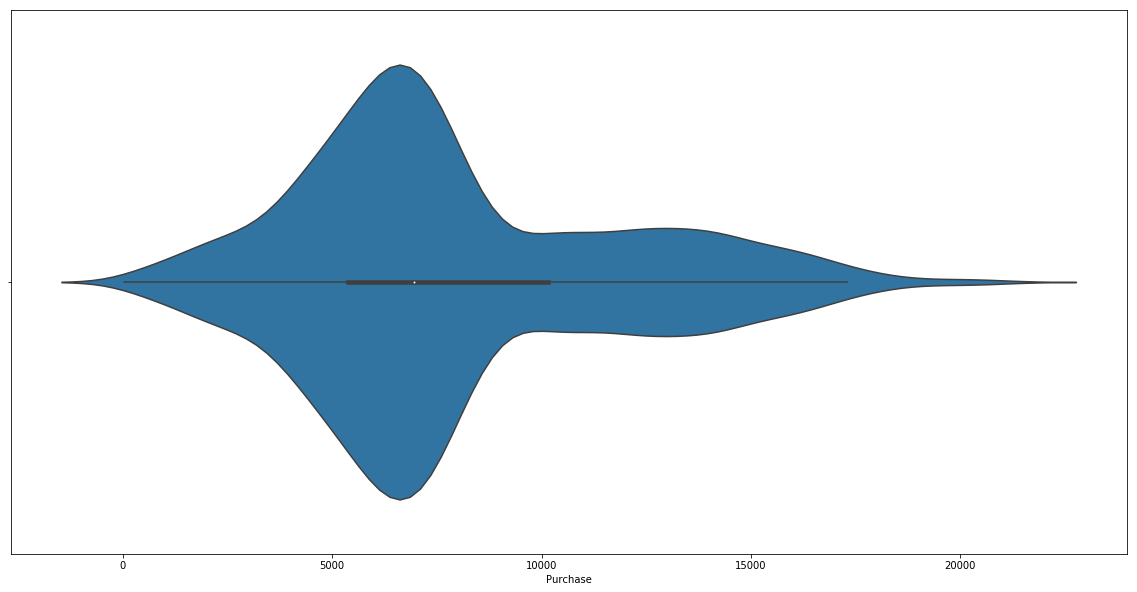

In [13]:
sns.violinplot(train.groupby('Product_ID')['Purchase'].mean())

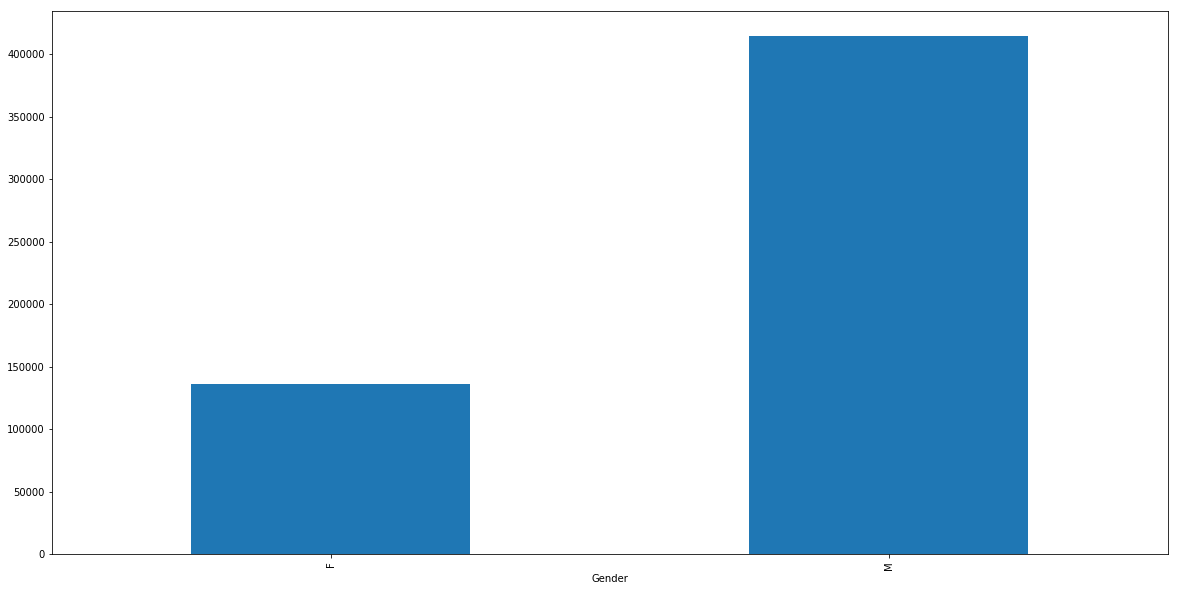

In [14]:
train.groupby('Gender')['Purchase'].count().plot.bar()

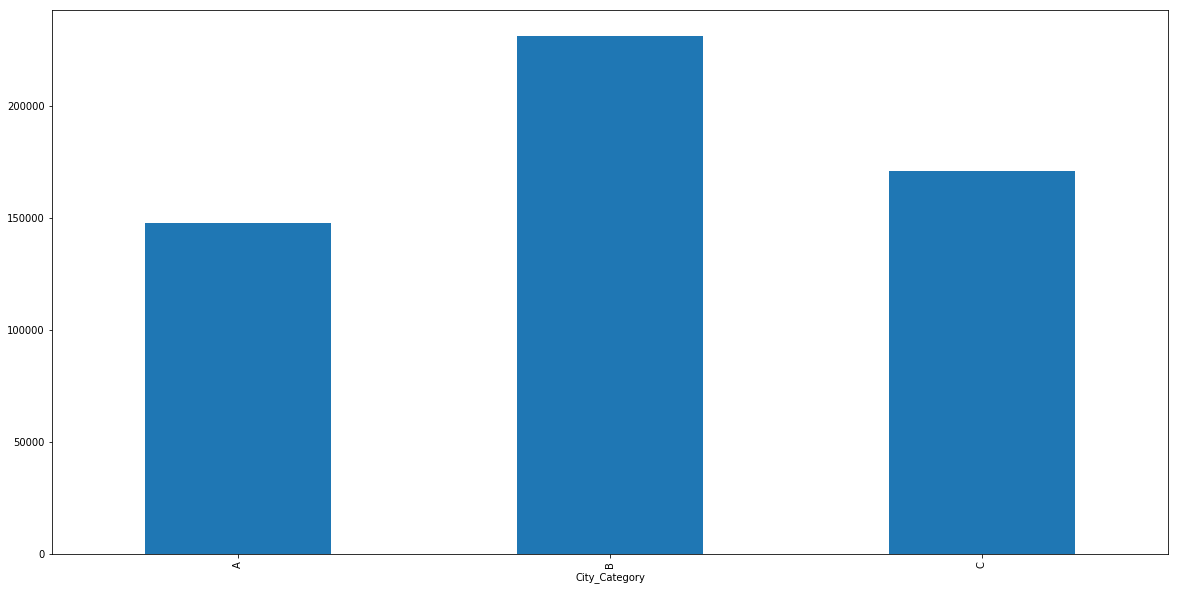

In [15]:
train.groupby('City_Category')['Purchase'].count().plot.bar()

In [16]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

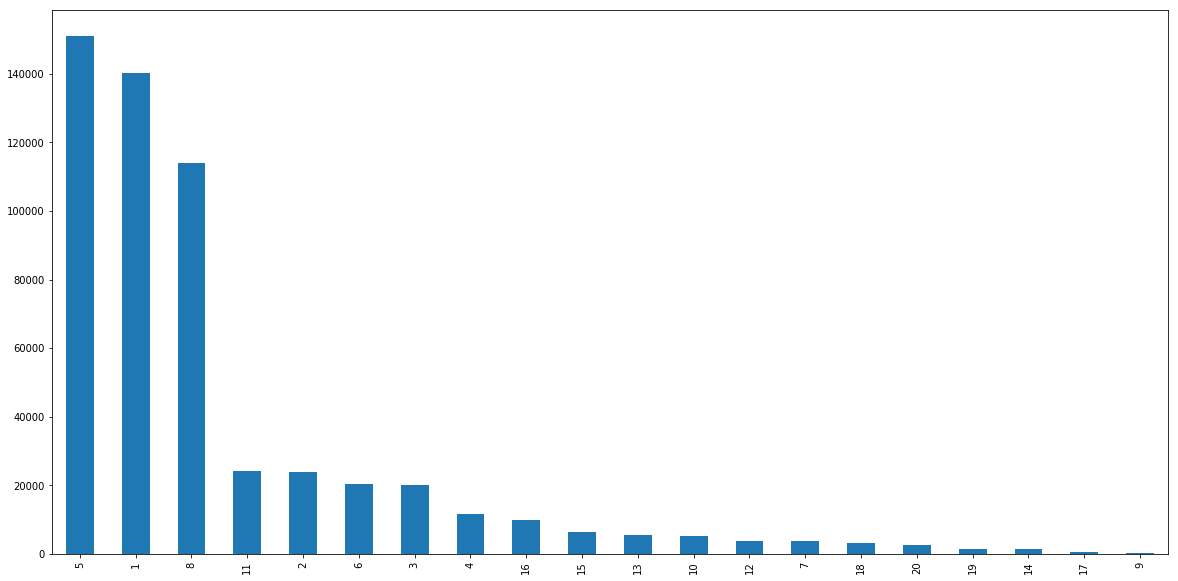

In [17]:
train.Product_Category_1.value_counts().plot.bar()

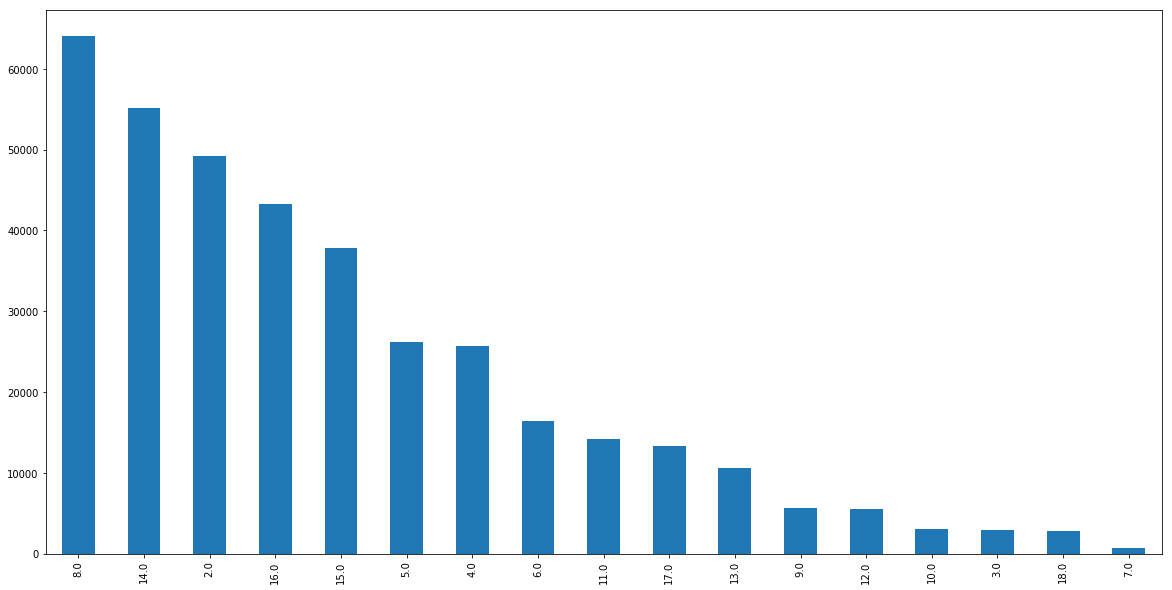

In [18]:
train.Product_Category_2.value_counts().plot.bar()

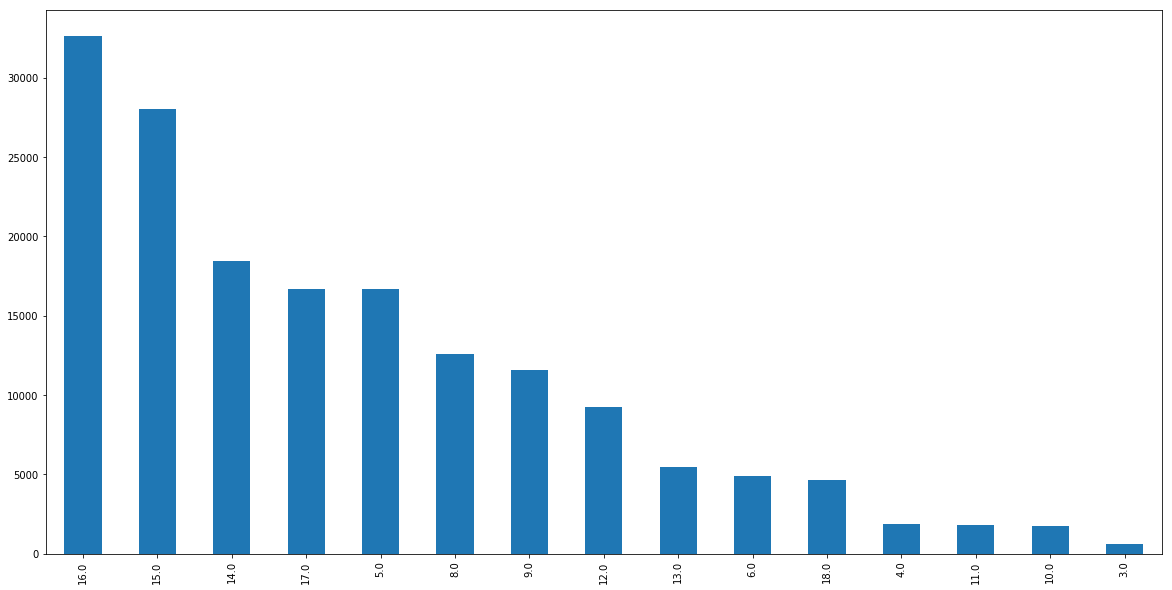

In [19]:
train.Product_Category_3.value_counts().plot.bar()

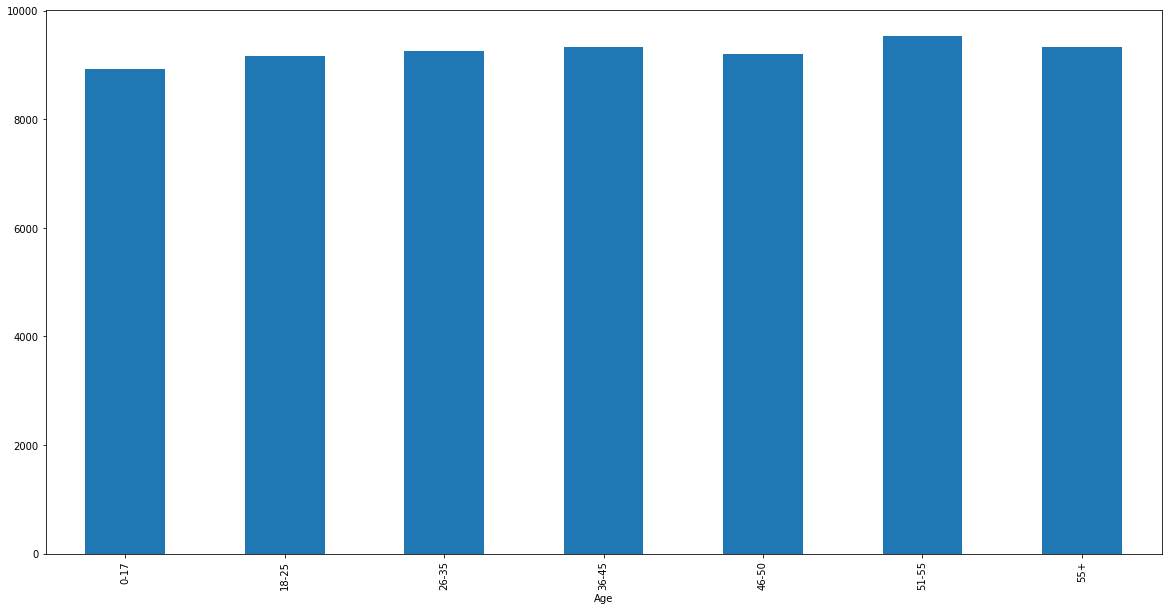

In [20]:
train.groupby('Age')['Purchase'].mean().plot.bar()

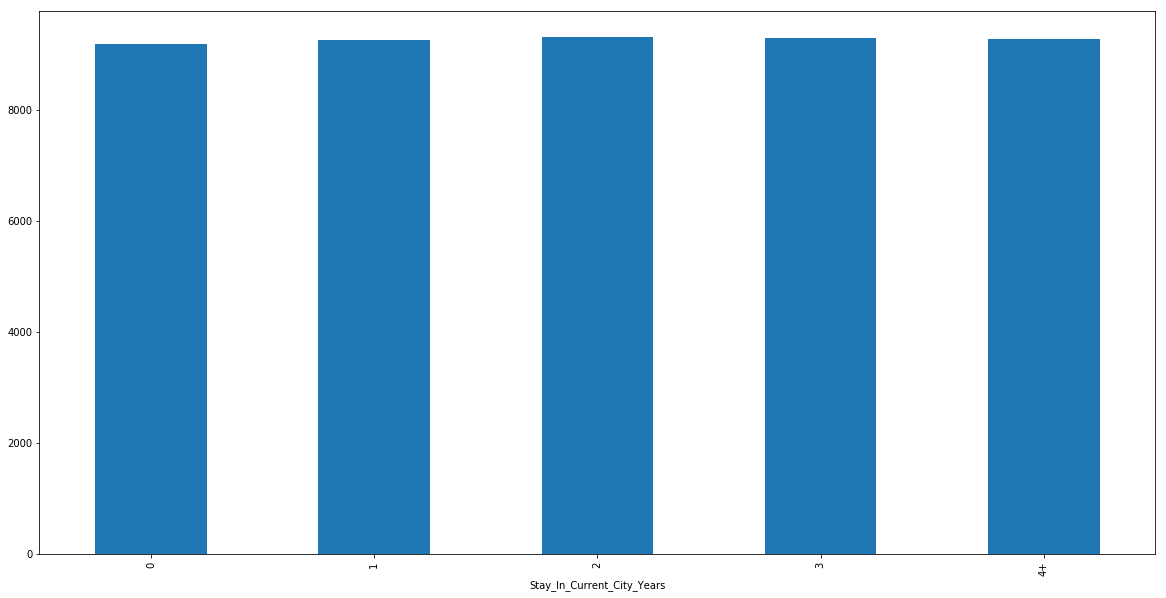

In [21]:
train.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot.bar()

In [22]:
train.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [23]:
train.Gender.replace({'M':1, 'F':0}, inplace=True)
train.Age.replace({'0-17': 17, '18-25': 25, '26-35': 35, '36-45':45, '46-50': 50, '51-55': 55, '55+': 56}, inplace=True)
train.Stay_In_Current_City_Years.replace({'4+': 4}, inplace=True)

In [24]:
train.Age.value_counts()

35    219587
45    110013
25     99660
50     45701
55     38501
56     21504
17     15102
Name: Age, dtype: int64

In [25]:
test.Gender.replace({'M':1, 'F':0}, inplace=True)
test.Age.replace({'0-17': 17, '18-25': 25, '26-35': 35, '36-45':45, '46-50': 50, '51-55': 55, '55+': 56}, inplace=True)
test.Stay_In_Current_City_Years.replace({'4+': 4}, inplace=True)

In [26]:
train.isna().sum()/train.shape[0]*100, test.isna().sum()/train.shape[0]*100

(User_ID                        0.000000
 Product_ID                     0.000000
 Gender                         0.000000
 Age                            0.000000
 Occupation                     0.000000
 City_Category                  0.000000
 Stay_In_Current_City_Years     0.000000
 Marital_Status                 0.000000
 Product_Category_1             0.000000
 Product_Category_2            31.566643
 Product_Category_3            69.672659
 Purchase                       0.000000
 dtype: float64, User_ID                        0.000000
 Product_ID                     0.000000
 Gender                         0.000000
 Age                            0.000000
 Occupation                     0.000000
 City_Category                  0.000000
 Stay_In_Current_City_Years     0.000000
 Marital_Status                 0.000000
 Product_Category_1             0.000000
 Product_Category_2            13.151829
 Product_Category_3            29.553073
 dtype: float64)

In [27]:
train.Product_Category_2.fillna(train.Product_Category_2.mode()[0], inplace=True)
train.Product_Category_3.fillna(train.Product_Category_3.mode()[0], inplace=True)

In [28]:
test.Product_Category_2.fillna(test.Product_Category_2.mode()[0], inplace=True)
test.Product_Category_3.fillna(test.Product_Category_3.mode()[0], inplace=True)

In [29]:
# train.Product_ID = train.Product_ID.astype(str)
# test.Product_ID = train.Product_ID.astype(str)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 50.4+ MB


In [31]:
city_catgories = pd.get_dummies(train[['City_Category']])
city_catgories_test = pd.get_dummies(test[['City_Category']])

In [32]:
train = pd.concat([train, city_catgories], axis=1)
test = pd.concat([test, city_catgories_test], axis=1)

In [33]:
train.drop('City_Category', axis=1, inplace=True)
test.drop('City_Category', axis=1, inplace=True)

In [34]:
train['no_of_products'] = train.User_ID.map(train.groupby('User_ID')['Product_ID'].count())
test['no_of_products'] = test.User_ID.map(test.groupby('User_ID')['Product_ID'].count())

In [35]:
train.Age = train.Age.astype(int)
train.Stay_In_Current_City_Years = train.Stay_In_Current_City_Years.astype(int)
test.Age = test.Age.astype(int)
test.Stay_In_Current_City_Years = test.Stay_In_Current_City_Years.astype(int)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 15 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int64
Age                           550068 non-null int32
Occupation                    550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
City_Category_A               550068 non-null uint8
City_Category_B               550068 non-null uint8
City_Category_C               550068 non-null uint8
no_of_products                550068 non-null int64
dtypes: float64(2), int32(2), int64(7), object(1), uint8(3)
memory usage: 47.7+ MB


In [37]:
train.corr()['Purchase']

User_ID                       0.004716
Gender                        0.060346
Age                           0.016614
Occupation                    0.020833
Stay_In_Current_City_Years    0.005422
Marital_Status               -0.000463
Product_Category_1           -0.343703
Product_Category_2           -0.128651
Product_Category_3           -0.185945
Purchase                      1.000000
City_Category_A              -0.042465
City_Category_B              -0.019098
City_Category_C               0.061012
no_of_products               -0.090356
Name: Purchase, dtype: float64

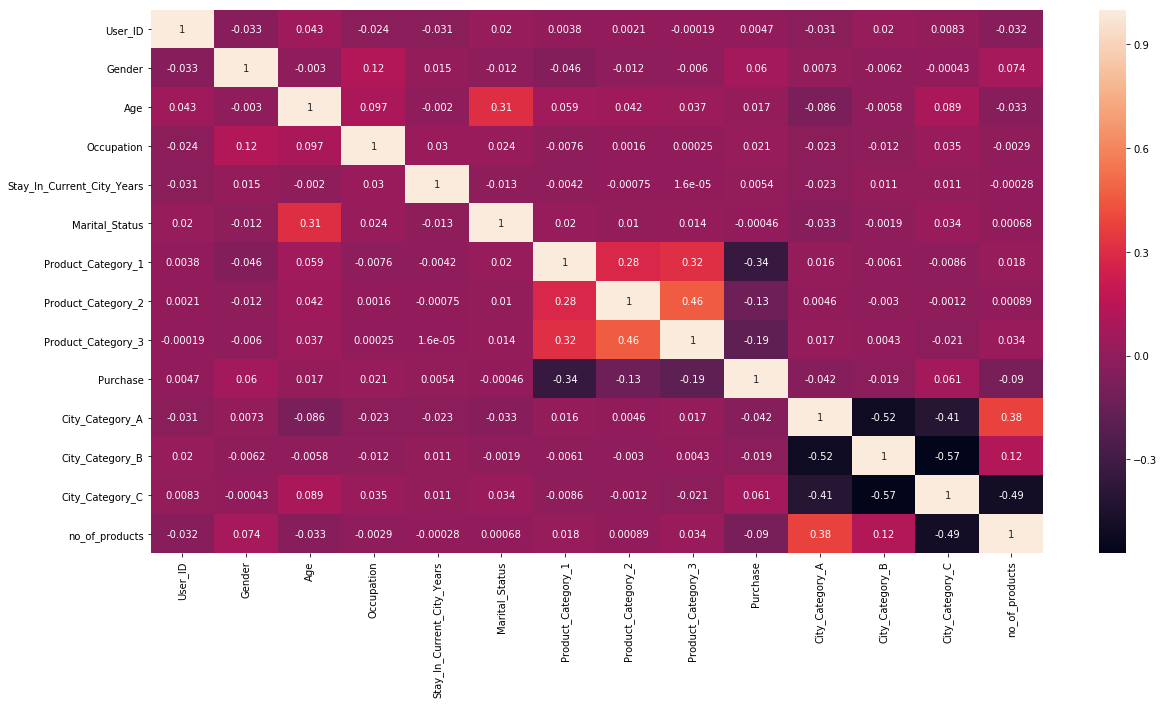

In [38]:
sns.heatmap(train.corr(), annot=True)

In [39]:
# in_vars = train.drop(['Purchase', 'Product_ID'], axis=1).columns
in_vars = ['Product_Category_1', 'no_of_products', 'User_ID', 'Product_Category_2', 
           'Product_Category_3', 'Occupation', 'Age', 'Stay_In_Current_City_Years']
y_var = 'Purchase'

In [40]:
import lightgbm as lgbm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [41]:
train.shape

(550068, 15)

In [42]:
550068*0.7

385047.6

In [43]:
lg = lgbm.LGBMRegressor()
lg.fit(train[in_vars][:-38000], train[y_var][:-38000])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              learning_rate=0.1, max_depth=-1, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=1)

In [44]:
lg.score(train[in_vars][-38000:], train[y_var][-38000:])

0.7143514048416925

Text(0.5,0,'feature relevance')

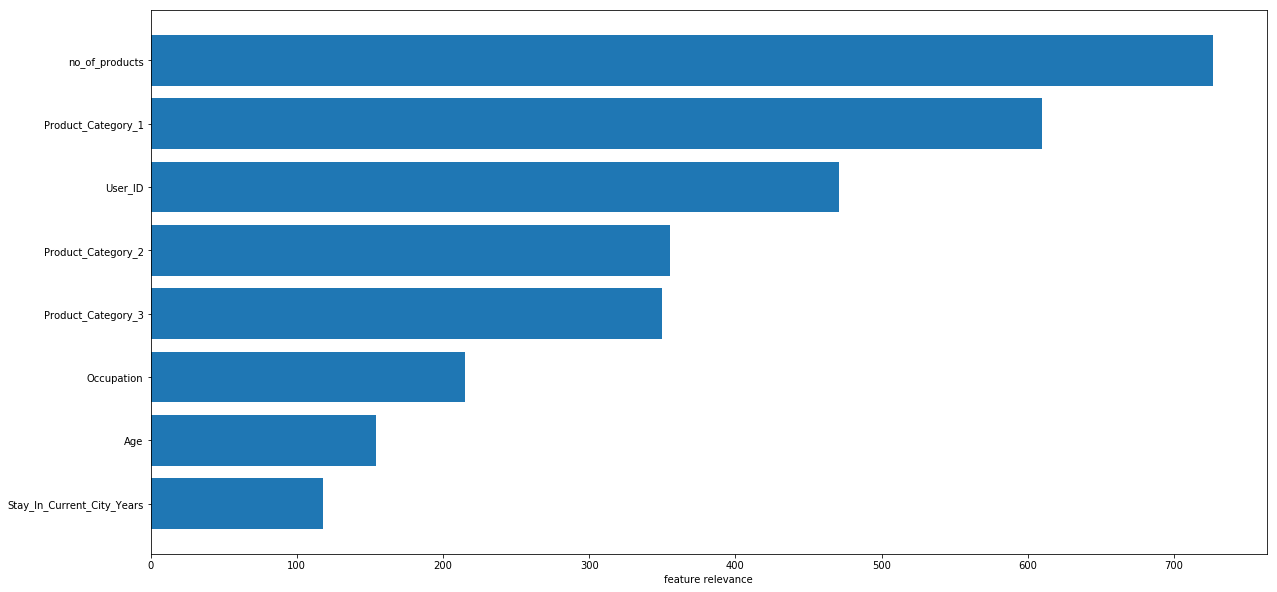

In [45]:
features = in_vars
feature_importance = lg.feature_importances_
indices = np.argsort(feature_importance)
plt.barh(range(len(indices)), feature_importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('feature relevance')

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor

In [47]:
for md in [9, 10, 12, 15, 17, 20, 24]:
    kf = KFold(n_splits=5, shuffle=True)
    scores = []
    for traincv, testcv in kf.split(train):
        rf_model = RandomForestRegressor(max_depth=md)
        rf_model.fit(train[in_vars].iloc[traincv], train[y_var].iloc[traincv])
        rsme = np.sqrt(mean_squared_error(train[y_var].iloc[testcv], rf_model.predict(train[in_vars].iloc[testcv])))
        scores.append(rsme)
#         print(rsme)
    print('RSME', np.mean(scores), 'for maxdepth: ', md)

RSME 2935.385880130568 for maxdepth:  9
RSME 2922.521074687328 for maxdepth:  10
RSME 2902.0653784254723 for maxdepth:  12
RSME 2879.2039710515155 for maxdepth:  15
RSME 2872.556738862501 for maxdepth:  17
RSME 2885.439050419105 for maxdepth:  20
RSME 2938.4585457598632 for maxdepth:  24


In [48]:
model = RandomForestRegressor(max_depth=20)
model.fit(train[in_vars], train[y_var])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
test['Purchase'] = model.predict(test[in_vars])
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_A,City_Category_B,City_Category_C,no_of_products,Purchase
0,1000004,P00128942,1,50,7,2,1,1,11.0,16.0,0,1,0,1,14090.023899
1,1000009,P00113442,1,35,17,0,0,3,5.0,16.0,0,0,1,27,9612.650000
2,1000010,P00288442,0,45,1,4,1,5,14.0,16.0,0,1,0,101,6650.300485
3,1000010,P00145342,0,45,1,4,1,4,9.0,16.0,0,1,0,101,2540.025325
4,1000011,P00053842,0,35,1,1,0,4,5.0,12.0,0,0,1,40,2501.865217


In [50]:
test.User_ID = test.User_ID.astype(str)

In [51]:
test['Comb'] = test.User_ID + test.Product_ID
test[['Comb', 'Purchase']].to_csv('predictions.csv', index=False)

In [52]:
test[['Comb', 'Purchase']]

,Comb,Purchase
0,1000004P00128942,14090.023899
1,1000009P00113442,9612.650000
2,1000010P00288442,6650.300485
3,1000010P00145342,2540.025325
4,1000011P00053842,2501.865217
...,...,...
233594,1006036P00118942,8214.618633
233595,1006036P00254642,4450.788177
233596,1006036P00031842,13186.648333
233597,1006037P00124742,21583.590357


In [53]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))